In [1]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

import numpy as np
import matplotlib.pyplot as plt
import scienceplots

import candel
from candel import SPEED_OF_LIGHT
from h5py import File

from utils import *

from scipy.stats import norm
from astropy.cosmology import FlatLambdaCDM
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

root = "/Users/rstiskalek/Projects/CANDEL/results/CH0"

config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config_shoes.toml"
data = candel.pvdata.load_SH0ES_from_config(config_path)

import candel

COLS = ["#87193d", "#1e42b9", "#d42a29", "#05dd6b", "#ee35d5"]


2025-09-04 12:10:11 warning: zero width found in the priors. Setting it to 1e-5.
2025-09-04 12:10:11 indices of zero width: [44]
2025-09-04 12:10:11 found zero-width prior at index 44. Setting it to 0.
2025-09-04 12:10:12 Masking Cepheids with cz_cmb > 3300 km/s: Keeping 35 out of 37.


2025-09-04 12:10:14 warning: zero width found in the priors. Setting it to 1e-5.
2025-09-04 12:10:14 indices of zero width: [44]
2025-09-04 12:10:14 found zero-width prior at index 44. Setting it to 0.
2025-09-04 12:10:14 Masking Cepheids with cz_cmb > 3300 km/s: Keeping 35 out of 37.
2025-09-04 12:10:17 initially loaded 1701 galaxies from Pantheon+ data.
mag comparison  KstestResult(statistic=0.0957983193277311, pvalue=0.9429826796423542, statistic_location=12.753999710083008, statistic_sign=1)
cz comparison  KstestResult(statistic=0.13950892857142858, pvalue=0.5997075093106606, statistic_location=1648.858519, statistic_sign=1)


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_25150/4251032398.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_25150/4251032398.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


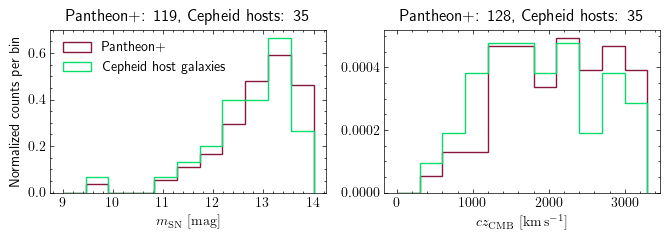

In [2]:
from scipy.stats import kstest

data_sel = candel.pvdata.load_SH0ES_separated("/Users/rstiskalek/Projects/CANDEL/data/SH0ES", cepheid_host_cz_cmb_max=3300)
data_pp = candel.pvdata.load_PantheonPlus("/Users/rstiskalek/Projects/CANDEL/data/Pantheon+", return_all=True, removed_PV_from_covmat=False)
data_2mpp = np.genfromtxt("/Users/rstiskalek/Projects/CANDEL/data/2M++/2M++_galaxy_catalog.dat", delimiter="|")

bins_mag = np.linspace(9, 14.0, 12)
bins_cz = np.linspace(0, 3300, 12)

mask_mag_pp = data_pp["mag"] < 14
mask_cz_pp = data_pp["zcmb"] < 3300 / candel.SPEED_OF_LIGHT
mask_2mpp = (data_2mpp[:, 7] < 3300) & (data_2mpp[:, 7] > 0)

hist_kwargs = {"density": True, "histtype": "step"}

with plt.style.context("science"):
    fig, axes = plt.subplots(1, 2, figsize=(6.8, 2.5))
    
    # --- Left panel (mag.s) ---
    ax = axes[0]
    ax.hist(data_pp["mag"][mask_mag_pp], bins=bins_mag,
            label=r"Pantheon+", **hist_kwargs, color=COLS[0])
    ax.hist(data_sel["mag_SN_unique_Cepheid_host"], bins=bins_mag,
            label="Cepheid host galaxies", **hist_kwargs, color=COLS[3])
    p = kstest(data_sel["mag_SN_unique_Cepheid_host"], data_pp["mag"][mask_mag_pp])
    print("mag comparison ", p)

    ax.set_xlabel(r"$m_{\rm SN} ~ [\mathrm{mag}]$")
    ax.set_ylabel(r"Normalized counts per bin")
    ax.legend()
    
    n_pp_mag = mask_mag_pp.sum()
    n_host_mag = len(data_sel["mag_SN_unique_Cepheid_host"])
    ax.set_title(f"Pantheon+: {n_pp_mag},  Cepheid hosts: {n_host_mag}")
    
    # --- Right panel (cz) ---
    ax = axes[1]
    ax.hist(data_pp["zcmb"][mask_cz_pp] * candel.SPEED_OF_LIGHT, bins=bins_cz,
            **hist_kwargs, color=COLS[0])
    ax.hist(data_sel["czcmb_cepheid_host"], bins=bins_cz, **hist_kwargs, color=COLS[3])
    p = kstest(data_sel["czcmb_cepheid_host"], data_pp["zcmb"][mask_cz_pp] * candel.SPEED_OF_LIGHT)
    print("cz comparison ", p)

    ax.set_xlabel(r"$cz_{\rm CMB} ~ [\mathrm{km}\,\mathrm{s}^{-1}]$")
    ax.legend()
    
    n_pp_cz = mask_cz_pp.sum()
    n_host_cz = len(data_sel["czcmb_cepheid_host"])
#     n_2mpp = mask_2mpp.sum()
    ax.set_title(f"Pantheon+: {n_pp_cz}, Cepheid hosts: {n_host_cz}")
    
    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/SH0ES_host_histograms.pdf", dpi=450)
    fig.show()

2025-09-04 12:47:38 warning: zero width found in the priors. Setting it to 1e-5.
2025-09-04 12:47:38 indices of zero width: [44]
2025-09-04 12:47:38 found zero-width prior at index 44. Setting it to 0.
2025-09-04 12:47:38 Masking Cepheids with cz_cmb > 3300 km/s: Keeping 35 out of 37.
2025-09-04 12:47:39 initially loaded 1701 galaxies from Pantheon+ data.
mag comparison  KstestResult(statistic=0.0957983193277311, pvalue=0.9429826796423542, statistic_location=12.753999710083008, statistic_sign=1)
cz comparison  KstestResult(statistic=0.13950892857142858, pvalue=0.5997075093106606, statistic_location=1648.858519, statistic_sign=1)


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_25150/3939226879.py:182: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


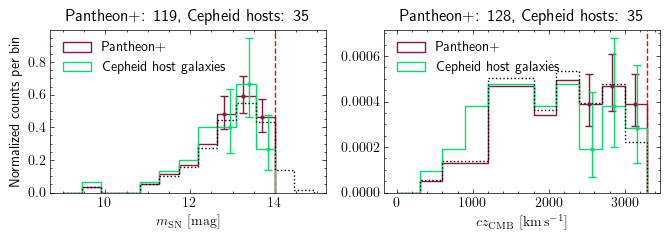

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, chi2

# --- Garwood CI for Poisson counts ---
def _garwood_ci(counts, level=0.68):
    alpha = 1.0 - level
    lo = 0.5 * chi2.ppf(alpha / 2.0, 2 * counts)
    hi = 0.5 * chi2.ppf(1 - alpha / 2.0, 2 * (counts + 1))
    lo = np.where(counts == 0, 0.0, lo)
    return lo, hi


def hist_with_poisson(ax, x, bins, *, density=True, color=None, label=None,
                      use_garwood=True, level=0.68, last_nbins=None,
                      xoffset=0.0,
                      step_kwargs=None, err_kwargs=None):
    """Plot a step histogram and Poisson error bars.

    Error bars only for the last `last_nbins` bins (if set).
    Use `xoffset` (fraction of bin width) to shift error bars horizontally.
    """
    step_kwargs = {} if step_kwargs is None else step_kwargs
    err_kwargs = {} if err_kwargs is None else err_kwargs

    # Visual step histogram
    ax.hist(x, bins=bins, density=density, histtype="step",
            color=color, label=label, **step_kwargs)

    # Counts for errors
    counts, edges = np.histogram(x, bins=bins)
    centers = 0.5 * (edges[:-1] + edges[1:])
    widths = np.diff(edges)
    ntot = counts.sum()

    if density:
        y = np.divide(counts, ntot * widths, out=np.zeros_like(counts, float),
                      where=(ntot > 0) & (widths > 0))
        if use_garwood:
            lo, hi = _garwood_ci(counts.astype(int), level=level)
            ylo = np.where(widths > 0, (counts - lo) / (ntot * widths), 0.0)
            yhi = np.where(widths > 0, (hi - counts) / (ntot * widths), 0.0)
            yerr = np.vstack([ylo, yhi])
        else:
            yerr = np.divide(np.sqrt(counts), ntot * widths,
                             out=np.zeros_like(counts, float),
                             where=(ntot > 0) & (widths > 0))
    else:
        y = counts
        if use_garwood:
            lo, hi = _garwood_ci(counts.astype(int), level=level)
            yerr = np.vstack([counts - lo, hi - counts])
        else:
            yerr = np.sqrt(counts)

    # Indices for the last N bins
    if last_nbins is None:
        idx = None
    else:
        idx = np.arange(len(counts))[-last_nbins:]

    # Offset centers for error bars
    centers_off = centers[idx] + xoffset * widths[idx]

    if idx is not None and idx.size > 0:
        ax.errorbar(
            centers_off,
            y[idx],
            yerr[:, idx] if (hasattr(yerr, "ndim") and yerr.ndim == 2) else yerr[idx],
            fmt="o",
            ms=2,
            color=color,
            capsize=3,
            linewidth=1,
            **err_kwargs,
        )


# ---------------- Your data + plotting ----------------
data_sel = candel.pvdata.load_SH0ES_separated(
    "/Users/rstiskalek/Projects/CANDEL/data/SH0ES",
    cepheid_host_cz_cmb_max=3300
)
data_pp = candel.pvdata.load_PantheonPlus(
    "/Users/rstiskalek/Projects/CANDEL/data/Pantheon+",
    return_all=True,
    removed_PV_from_covmat=False
)
data_2mpp = np.genfromtxt(
    "/Users/rstiskalek/Projects/CANDEL/data/2M++/2M++_galaxy_catalog.dat",
    delimiter="|"
)

# Bins
bins_mag = np.linspace(9, 14.0, 12)
bins_cz = np.linspace(0, 3300, 12)

bins_mag_wider = np.arange(9, 15, bins_mag[1] - bins_mag[0])
bins_cz_wider = np.arange(0, 3500, bins_cz[1] - bins_cz[0])

# Masks
mask_mag_pp = data_pp["mag"] < 14
mask_cz_pp = data_pp["zcmb"] < 3300 / candel.SPEED_OF_LIGHT
mask_2mpp = (data_2mpp[:, 7] < 3300) & (data_2mpp[:, 7] > 0)

LAST_NBINS = 3  # show error bars only for the last N bins

with plt.style.context("science"):
    fig, axes = plt.subplots(1, 2, figsize=(6.8, 2.5))

    # --- Left panel (magnitudes) ---
    ax = axes[0]
    hist_with_poisson(
        ax, data_pp["mag"][mask_mag_pp], bins_mag,
        density=True, color=COLS[0], label=r"Pantheon+",
        last_nbins=LAST_NBINS, xoffset=-0.15
    )
    hist_with_poisson(
        ax, data_sel["mag_SN_unique_Cepheid_host"], bins_mag,
        density=True, color=COLS[3], label="Cepheid host galaxies",
        last_nbins=LAST_NBINS, xoffset=+0.15
    )
    
    hist_with_poisson(
        ax, data_pp["mag"][mask_cz_pp], bins_mag_wider,
        density=True, color="k", step_kwargs={"linestyle": "dotted"},
        last_nbins=None,
    )
    ax.axvline(14, color="red", linestyle="dashed", zorder=-1)

    p = kstest(
        data_sel["mag_SN_unique_Cepheid_host"],
        data_pp["mag"][mask_mag_pp]
    )
    print("mag comparison ", p)

    ax.set_xlabel(r"$m_{\rm SN}~[\mathrm{mag}]$")
    ax.set_ylabel(r"Normalized counts per bin")
    ax.legend()

    n_pp_mag = mask_mag_pp.sum()
    n_host_mag = len(data_sel["mag_SN_unique_Cepheid_host"])
    ax.set_title(f"Pantheon+: {n_pp_mag},  Cepheid hosts: {n_host_mag}")

    # --- Right panel (cz) ---
    ax = axes[1]
    hist_with_poisson(
        ax, data_pp["zcmb"][mask_cz_pp] * candel.SPEED_OF_LIGHT, bins_cz,
        density=True, color=COLS[0], label=r"Pantheon+",
        last_nbins=LAST_NBINS, xoffset=-0.05
    )
    hist_with_poisson(
        ax, data_sel["czcmb_cepheid_host"], bins_cz,
        density=True, color=COLS[3], label="Cepheid host galaxies",
        last_nbins=LAST_NBINS, xoffset=+0.05
    )
        
    hist_with_poisson(
        ax, data_pp["zcmb"][mask_mag_pp] * candel.SPEED_OF_LIGHT, bins_cz_wider,
        density=True, color="k", step_kwargs={"linestyle": "dotted"},
        last_nbins=None,
    )

    ax.axvline(3300, color="red", linestyle="dashed", zorder=-1)


    p = kstest(
        data_sel["czcmb_cepheid_host"],
        data_pp["zcmb"][mask_cz_pp] * candel.SPEED_OF_LIGHT
    )
    print("cz comparison ", p)

    ax.set_xlabel(r"$cz_{\rm CMB}~[\mathrm{km}\,\mathrm{s}^{-1}]$")
    ax.legend()

    n_pp_cz = mask_cz_pp.sum()
    n_host_cz = len(data_sel["czcmb_cepheid_host"])
    ax.set_title(f"Pantheon+: {n_pp_cz}, Cepheid hosts: {n_host_cz}")

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/SH0ES_host_histograms.pdf", dpi=450)
    fig.show()

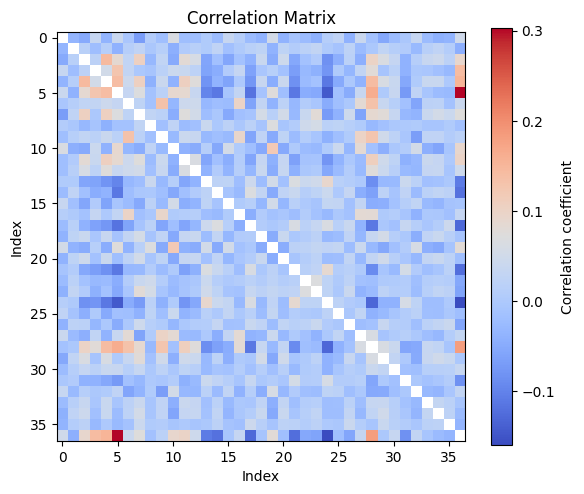

In [57]:
C = data["C_SN_unique_Cepheid_host"]

# Convert to correlation matrix
D = np.sqrt(np.diag(C))
corr = C / np.outer(D, D)

# For perfect numerical stability, set diag to 1
np.fill_diagonal(corr, np.nan)

# Plotting
plt.figure(figsize=(6, 5))
im = plt.imshow(corr, cmap='coolwarm')
plt.colorbar(im, label="Correlation coefficient")
plt.title("Correlation Matrix")
plt.xlabel("Index")
plt.ylabel("Index")
plt.tight_layout()
plt.savefig("/Users/rstiskalek/Downloads/correlation_matrix.png", dpi=300)
plt.show()

### Manticore-Carrick PV comparison

In [2]:
with File("/Users/rstiskalek/Projects/CANDEL/data/SH0ES/los_SH0ES_TFR_Carrick2015.hdf5", 'r') as f:
    r_C15 = f["r"][...]
    los_density_C15 = f["los_density"][...]
    los_velocity_C15 = f["los_velocity"][...]

with File("/Users/rstiskalek/Projects/CANDEL/data/SH0ES/los_SH0ES_TFR_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5", 'r') as f:
    r_Manticore = f["r"][...]
    los_density_Manticore = f["los_density"][...]
    los_velocity_Manticore = f["los_velocity"][...]


mu_host_r2_mag_sel = read_samples(root, "Cepheid_distances_no_redshift_r2_mu_SN_mag_sel.hdf5", "mu_host")
mu2r = candel.Distmod2Distance()
h = 0.7
r = mu2r(mu_host_r2_mag_sel, h=h)
r *= h
mean_r = np.mean(r, axis=0)
std_r = np.std(r, axis=0)


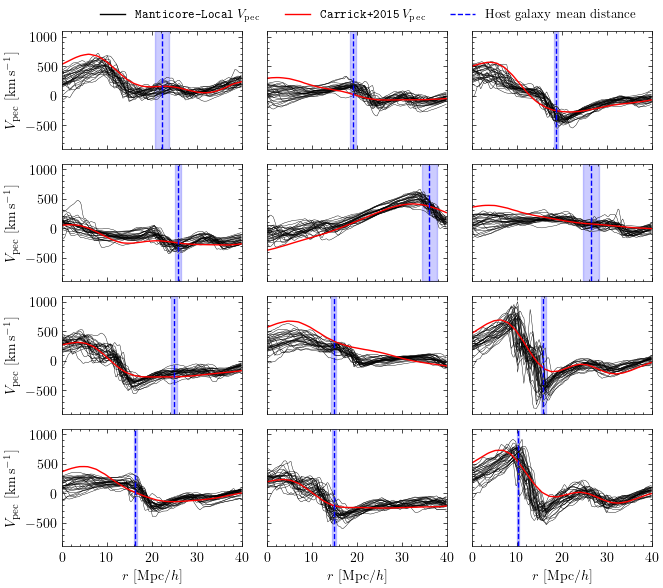

In [ ]:
import matplotlib.lines as mlines

k_all = np.arange(37)
gen = np.random.default_rng(45)
k_sample = gen.choice(k_all, size=12, replace=False)

Rmax = 40
m_Manticore = r_Manticore < Rmax
m_C15 = r_C15 < Rmax

with plt.style.context("science"):
    fig, axes = plt.subplots(4, 3, figsize=(6.8, 6), sharex=True, sharey=True)
    lw = plt.rcParams['lines.linewidth']

    for idx, k in enumerate(k_sample):
        ax = axes[idx // 3, idx % 3]
        # Only label on the first subplot to avoid duplicates
        for n in range(30):
            ax.plot(
                r_Manticore[m_Manticore],
                los_velocity_Manticore[n, k][m_Manticore],
                c="black", lw=0.3* lw,
                label=r"\texttt{Manticore} $V_{\rm pec}$" if (n == 0 and idx == 0) else None
            )
        ax.plot(
            r_C15[m_C15], 0.43 * los_velocity_C15[0, k][m_C15],
            c="red", label=r"\texttt{Carrick+2015} $V_{\rm pec}$" if idx == 0 else None,
        )
        ax.axvline(
            mean_r[k], c="blue", linestyle="--",
            label="Cepheid mean distance" if idx == 0 else None
        )

    for idx, k in enumerate(k_sample):
        ylim = ax.get_ylim()
        ax = axes[idx // 3, idx % 3]
        ax.fill_betweenx(
            [ylim[0], ylim[1]], mean_r[k] - std_r[k], mean_r[k] + std_r[k],
            color="blue", alpha=0.2, label="Cepheid distance uncertainty" if idx == 0 else None
        )
        ax.set_ylim(*ylim)

    # Set labels on outer axes
    for ax in axes[-1, :]:
        ax.set_xlabel(r"$r~[\mathrm{Mpc} / h]$")
    for ax in axes[:, 0]:
        ax.set_ylabel(r"$V_{\rm pec} ~ [\mathrm{km}\,\mathrm{s}^{-1}]$")
    
    for ax in axes.flatten():
        ax.set_xlim(0, Rmax)

    # Custom proxy lines for legend with increased linewidth
    proxy_manticore = mlines.Line2D([], [], color="black", label=r"\texttt{Manticore-Local} $V_{\rm pec}$")
    proxy_carrick   = mlines.Line2D([], [], color="red", label=r"\texttt{Carrick+2015} $V_{\rm pec}$")
    proxy_meanr     = mlines.Line2D([], [], color="blue", linestyle="--", label="Host galaxy mean distance")

    fig.legend(
        handles=[proxy_manticore, proxy_carrick, proxy_meanr],
        loc='upper center',
        bbox_to_anchor=(0.55, 1.0),
        ncol=3,
        fontsize=9,
        frameon=False
    )

    plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space at top for legend
    plt.savefig("/Users/rstiskalek/Downloads/Vpec_LOS.pdf", bbox_inches='tight', dpi=450)
    plt.show()

### Hubble diagrams Cepheid-only Hubble diagrams

In [2]:
# Read-in the data
mu_host_r2 = read_samples(root, "Cepheid_distances_no_redshift_r2_mu.hdf5", "mu_host")
mu_host_r2_mag_sel = read_samples(root, "Cepheid_distances_no_redshift_r2_mu_SN_mag_sel.hdf5", "mu_host")
mu_host_unif = read_samples(root, "Cepheid_distances_no_redshift_uniform_mu.hdf5","mu_host")


mu_host_r2_mean = np.mean(mu_host_r2, axis=0)
mu_host_r2_mag_sel_mean = np.mean(mu_host_r2_mag_sel, axis=0)
mu_host_unif_mean = np.mean(mu_host_unif, axis=0)

mu_host_r2_err = np.std(mu_host_r2, axis=0)
mu_host_r2_mag_sel_err = np.std(mu_host_r2_mag_sel, axis=0)
mu_host_unif_err = np.std(mu_host_unif, axis=0)

cz = data["czcmb_cepheid_host"]
cz_err = np.ones_like(cz) * 250

/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_48817/3869121327.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


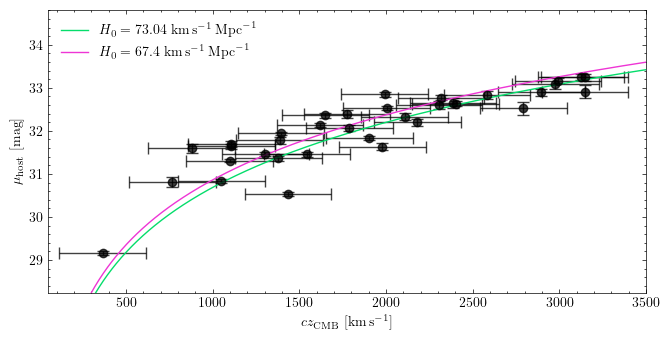

In [8]:
# Prepare the Hubble diagram plots
czrange = np.linspace(300, 5250, 1000)
zrange = czrange / SPEED_OF_LIGHT

cosmo_SH0ES = FlatLambdaCDM(H0=73.04, Om0=0.3)
mu_SH0ES = cosmo_SH0ES.distmod(czrange / SPEED_OF_LIGHT).value

cosmo_Planck = FlatLambdaCDM(H0=67.4, Om0=0.3)
mu_Planck = cosmo_Planck.distmod(czrange / SPEED_OF_LIGHT).value


# Compute SH0ES and Planck model predictions at the data cz points
mu_SH0ES_cz = np.interp(cz, czrange, mu_SH0ES)
mu_Planck_cz = np.interp(cz, czrange, mu_Planck)


m = cz < 3300

with plt.style.context("science"):
    fig, ax = plt.subplots(figsize=(6.8, 3.5))

    ax.errorbar(
        cz[m], mu_host_r2_mag_sel_mean[m], xerr=cz_err[m], yerr=mu_host_r2_mag_sel_err[m],
        fmt="o", color="black", capsize=4, alpha=0.75
    )

    ax.plot(
        czrange, mu_SH0ES, color=COLS[3],
        label=r"$H_0 = 73.04~\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$"
    )
    ax.plot(
        czrange, mu_Planck, color=COLS[4],
        label=r"$H_0 = 67.4~\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$"
    )

    ax.set_xlabel(r"$c z_{\rm CMB} ~ [\mathrm{km}\,\mathrm{s}^{-1}]$")
    ax.set_ylabel(r"$\mu_{\rm host} ~ [\mathrm{mag}]$")
    ax.set_xlim(50, 3500)
    ax.set_ylim(mu_Planck.min())
    # ax.set_xscale("log")
    ax.legend()

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/mu_host_cz.pdf", dpi=500, bbox_inches="tight")
    fig.show()

### Comparison of Cepheid-only distance

SH0ES_fiducial.hdf5: H0, M_B, M_W, Z_W, b_W, dZP, mu_LMC, mu_M31, mu_N4258, mu_host
Cepheid_distances_no_redshift_uniform_mu.hdf5: M_W, Z_W, b_W, dZP, mu_LMC, mu_M31, mu_N4258, mu_host
Cepheid_distances_no_redshift_r2_mu.hdf5: M_W, Z_W, b_W, dZP, mu_LMC, mu_M31, mu_N4258, mu_host
Cepheid_distances_no_redshift_r2_mu_SN_mag_sel.hdf5: M_B, M_W, Z_W, b_W, dZP, mu_LMC, mu_M31, mu_N4258, mu_host
Cepheid_distances_no_redshift_r2_mu_Cepheid_mag_sel.hdf5: M_W, Z_W, b_W, dZP, mu_LMC, mu_M31, mu_N4258, mu_host
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
2025-07-21 15:25:28 [INFO] Saving GetDist triangle plot to: /Users/rstiskalek/Downloads/anchor_distances.pdf


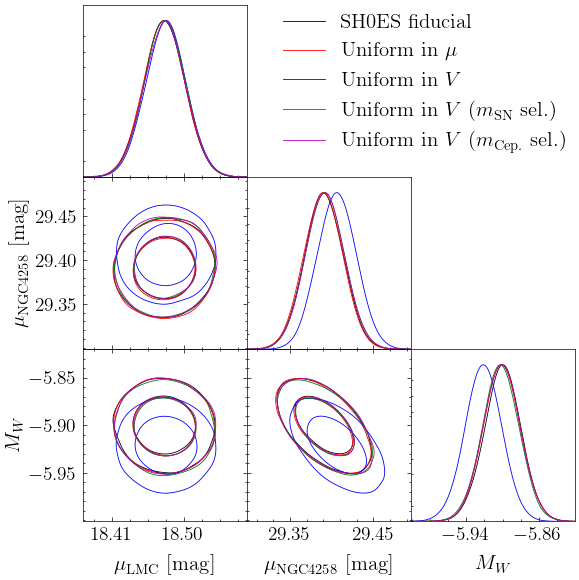

In [96]:
fnames = [
    "SH0ES_fiducial.hdf5",
    "Cepheid_distances_no_redshift_uniform_mu.hdf5",
    "Cepheid_distances_no_redshift_r2_mu.hdf5",
    "Cepheid_distances_no_redshift_r2_mu_SN_mag_sel.hdf5",
    "Cepheid_distances_no_redshift_r2_mu_Cepheid_mag_sel.hdf5",
]
labels = [
    "SH0ES fiducial",
    r"Uniform in $\mu$",
    r"Uniform in $V$",
    r"Uniform in $V$ ($m_{\rm SN}$ sel.)",
    r"Uniform in $V$ ($m_{\rm Cep.}$ sel.)",
]

fnames = [join(root, fname) for fname in fnames]


candel.plot_corner_from_hdf5(
    fnames,
    keys=["mu_LMC", "mu_N4258", "M_W"],
    labels=labels,
    filled=False,
    fontsize=18,
    filename="/Users/rstiskalek/Downloads/anchor_distances.pdf",
    )

### M_W calibration

In [6]:
M_HST, e_M_HST = data["M_HST"], data["e_M_HST"]
M_Gaia, e_M_Gaia = data["M_Gaia"], data["e_M_Gaia"]

print("M_HST: ", M_HST, "±", e_M_HST)
print("M_Gaia: ", M_Gaia, "±", e_M_Gaia)

M_HST:  -5.803876 ± 0.08194048719540387
M_Gaia:  -5.9034147 ± 0.025000005541368706


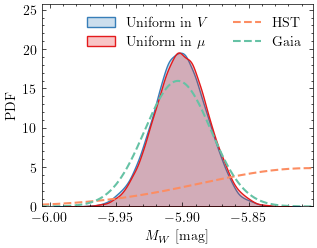

In [14]:
M_HST, e_M_HST = data["M_HST"], data["e_M_HST"]
M_Gaia, e_M_Gaia = data["M_Gaia"], data["e_M_Gaia"]
samples_r2 = read_samples(root, "Cepheid_distances_no_redshift_r2_mu_SN_mag_sel.hdf5", "M_W")
samples_uniform = read_samples(root, "Cepheid_distances_no_redshift_uniform_mu.hdf5", "M_W")


with plt.style.context("science"):
    plt.figure()
    lw = plt.rcParams["lines.linewidth"]

    # Plot KDEs instead of histograms
    sns.kdeplot(samples_r2, fill=True, label=r"Uniform in $V$", color="#377eb8", zorder=-1)
    sns.kdeplot(samples_uniform, fill=True, label=r"Uniform in $\mu$", color="#e41a1c", zorder=-1)

    # Plot Gaussian priors for HST and Gaia
    xlim = plt.xlim()
    x = np.linspace(*xlim, 500)

    plt.plot(x, norm.pdf(x, loc=M_HST, scale=e_M_HST), color="#fc8d62", label="HST", ls="--" , lw=1.5 * lw)
    plt.plot(x, norm.pdf(x, loc=M_Gaia, scale=e_M_Gaia), color="#66c2a5", label="Gaia", ls="--", lw=1.5 * lw)

    plt.xlim(*xlim)
    ymin, ymax = plt.ylim()
    plt.ylim(ymin, ymax * 1.25)  # Increase by 20%

    plt.xlabel(r"$M_W ~ [\mathrm{mag}]$")
    plt.ylabel(r"PDF")

    plt.legend(ncols=2)
    plt.savefig("/Users/rstiskalek/Downloads/M_W_distributions.pdf", dpi=500, bbox_inches="tight")
    plt.show()


### NGC 4258 calibration

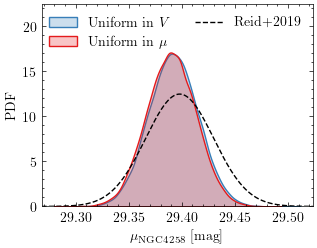

In [16]:
mean = data["mu_N4258_anchor"]
err = data["e_mu_N4258_anchor"]

samples_r2 = read_samples(root, "Cepheid_distances_no_redshift_r2_mu_SN_mag_sel.hdf5", "mu_N4258")
samples_uniform = read_samples(root, "Cepheid_distances_no_redshift_uniform_mu.hdf5", "mu_N4258")

with plt.style.context("science"):
    plt.figure()
    lw = plt.rcParams["lines.linewidth"]

    # Plot KDEs instead of histograms
    sns.kdeplot(samples_r2, fill=True, label=r"Uniform in $V$", color="#377eb8", zorder=-1)
    sns.kdeplot(samples_uniform, fill=True, label=r"Uniform in $\mu$", color="#e41a1c", zorder=-1)

    # Plot Gaussian priors for HST and Gaia
    xlim = plt.xlim()
    x = np.linspace(*xlim, 500)

    plt.plot(x, norm.pdf(x, loc=mean, scale=err), color="black", label="Reid+2019", ls="--")
    # plt.plot(x, norm.pdf(x, loc=M_Gaia, scale=e_M_Gaia), color="#66c2a5", label="Gaia", ls="--", lw=1.5 * lw)

    plt.xlim(*xlim)
    ymin, ymax = plt.ylim()
    plt.ylim(ymin, ymax * 1.25)  # Increase by 20%

    plt.xlabel(r"$\mu_{\rm NGC4258} ~ [\mathrm{mag}]$")
    plt.ylabel(r"PDF")

    plt.legend(ncols=2)
    plt.savefig("/Users/rstiskalek/Downloads/mu_NGC4258.pdf", dpi=500, bbox_inches="tight")
    plt.show()


### Cepheid-host galaxies distance comparison

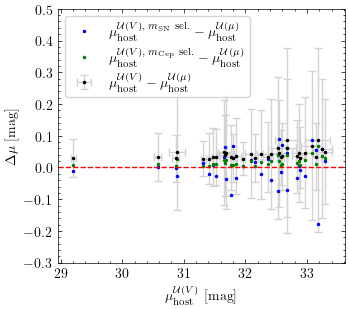

Δμ_unif    = 0.0445 ± 0.1456
Δμ_SN      = -0.0049 ± 0.1292
Δμ_Cepheid = 0.0218 ± 0.1456


In [10]:
# Load samples: shape (n_samples, 37)
mu_r2          = read_samples(root, "Cepheid_distances_no_redshift_r2_mu.hdf5", "mu_host")
mu_r2_SN       = read_samples(root, "Cepheid_distances_no_redshift_r2_mu_SN_mag_sel.hdf5", "mu_host")
mu_r2_Cepheid  = read_samples(root, "Cepheid_distances_no_redshift_r2_mu_Cepheid_mag_sel.hdf5", "mu_host")
mu_unif        = read_samples(root, "Cepheid_distances_no_redshift_uniform_mu.hdf5", "mu_host")

# Compute statistics for each host
mu_r2_mean        = mu_r2.mean(axis=0)
mu_r2_std         = mu_r2.std(axis=0)
mu_unif_mean      = mu_unif.mean(axis=0)
mu_unif_std       = mu_unif.std(axis=0)
mu_r2_SN_mean     = mu_r2_SN.mean(axis=0)
mu_r2_SN_std      = mu_r2_SN.std(axis=0)
mu_r2_Cepheid_mean = mu_r2_Cepheid.mean(axis=0)
mu_r2_Cepheid_std  = mu_r2_Cepheid.std(axis=0)

# Differences and uncertainties
diff_unif = mu_r2_mean - mu_unif_mean
err_unif  = np.sqrt(mu_r2_std**2 + mu_unif_std**2)

diff_SN   = mu_r2_SN_mean - mu_unif_mean
err_SN    = np.sqrt(mu_r2_SN_std**2 + mu_unif_std**2)

diff_Cepheid = mu_r2_Cepheid_mean - mu_unif_mean
err_Cepheid  = np.sqrt(mu_r2_Cepheid_std**2 + mu_unif_std**2)

m = data["czcmb_cepheid_host"] < 3300

with plt.style.context("science"):
    plt.figure(figsize=(6.8 / 2, 3))

    # With errorbars
    plt.errorbar(
        mu_r2_mean[m], diff_unif[m],
        xerr=mu_r2_std[m], yerr=err_unif[m],
        fmt='o', color='black',
        ecolor='lightgray', capsize=3, ms=1.5,
        label=r"$\mu_{\rm host}^{\mathcal{U}(V)} - \mu_{\rm host}^{\mathcal{U}(\mu)}$"
    )

    # Without errorbars
    plt.plot(
        mu_r2_mean[m], diff_SN[m], 'o', color='blue', ms=1.5,
        label=r"$\mu_{\rm host}^{\mathcal{U}(V),\,m_{\rm SN}~\mathrm{sel.}} - \mu_{\rm host}^{\mathcal{U}(\mu)}$"
    )
    plt.plot(
        mu_r2_mean[m], diff_Cepheid[m], 'o', color='green', ms=1.5,
        label=r"$\mu_{\rm host}^{\mathcal{U}(V),\,m_{\rm Cep}~\mathrm{sel.}} - \mu_{\rm host}^{\mathcal{U}(\mu)}$"
    )

    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel(r"$\mu_{\rm host}^{\mathcal{U}(V)} ~ [\mathrm{mag}]$")
    plt.ylabel(r"$\Delta \mu ~ [\mathrm{mag}]$")
    plt.ylim(-0.3, 0.5)
    plt.legend(frameon=True)
    plt.tight_layout(pad=0)
    plt.savefig("/Users/rstiskalek/Downloads/mu_host.pdf", bbox_inches='tight')
    plt.show()

print(f"Δμ_unif    = {diff_unif.mean():.4f} ± {err_unif.mean():.4f}")
print(f"Δμ_SN      = {diff_SN.mean():.4f} ± {err_SN.mean():.4f}")
print(f"Δμ_Cepheid = {diff_Cepheid.mean():.4f} ± {err_Cepheid.mean():.4f}")

### Effect of distance selection on distances

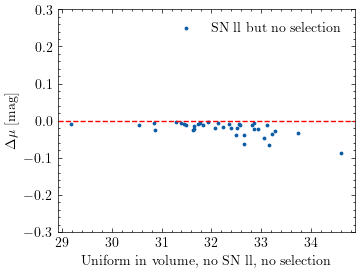

dx = -0.0218 ± 0.1456


In [102]:
# samples_r2 = read_samples(root, "Cepheid_distances_no_redshift_r2_mu.hdf5", "mu_host")
samples_r2 = read_samples(root, "Cepheid_distances_no_redshift_r2_mu_Cepheid_mag_sel.hdf5", "mu_host")
# samples_r2_SN_sel = read_samples(root, "Cepheid_distances_no_redshift_r2_mu_SN_mag_sel.hdf5", "mu_host")
# samples_r2 = read_samples(root, "Cepheid_distances_no_redshift_r2_mu_SN_mag_sel.hdf5", "mu_host")
# samples_r2_SN_sel = read_samples(root, "Cepheid_distances_no_redshift_r2_SN_ll_no_sel.hdf5", "mu_host")

samples_r2_SN_all = read_samples(root, "Cepheid_distances_no_redshift_uniform_mu.hdf5", "mu_host")

ntot = 37

X = {f"mu_{i}": samples_r2[:, i] for i in range(ntot)}
# Y = {f"mu_{i}": samples_r2_SN_sel[:, i] for i in range(ntot)}

Y = {f"mu_{i}": samples_r2_SN_all[:, i] for i in range(ntot)}

x_mean = np.asarray([np.mean(X[f"mu_{i}"]) for i in range(ntot)])
x_err = np.asarray([np.std(X[f"mu_{i}"]) for i in range(ntot)])

dy1_mean = np.asarray([np.mean(Y[f"mu_{i}"]) - np.mean(X[f"mu_{i}"]) for i in range(ntot)])
dy1_err = np.asarray([np.sqrt(np.var(Y[f"mu_{i}"]) + np.var(X[f"mu_{i}"])) for i in range(ntot)])

dy2_mean = np.asarray([np.mean(Y2[f"mu_{i}"]) - np.mean(X[f"mu_{i}"]) for i in range(ntot)])


with plt.style.context("science"):
    plt.figure()
    plt.scatter(x_mean, dy1_mean, s=3, label=r"SN ll but no selection")
    # plt.scatter(x_mean, dy2_mean, s=3, label=r"SN ll and selection")
    # plt.errorbar(x_mean, dy1_mean, xerr=x_err, yerr=dy1_err, fmt='o', color='black',
    #              ecolor='lightgray',  capsize=3, ms=1.5,
    #             #  label=r"$\mu_{\rm host}^{\mathcal{U}(V),\,m_{\rm SN}~\mathrm{sel.}} - \mu_{\rm host}^{\mathcal{U}(V)}$"
    #              )

    plt.axhline(0, color="red", linestyle="--", )
    plt.xlabel(r"Uniform in volume, no SN ll, no selection")
    plt.ylabel(r"$\Delta \mu ~ [\mathrm{mag}]$")
    plt.ylim(-0.3, 0.3)
    plt.legend()

    plt.tight_layout(pad=0)
    plt.savefig("/Users/rstiskalek/Downloads/mu_host_sel_test.png", bbox_inches='tight', dpi=450)

    plt.show()


print(f"dx = {dy1_mean.mean():.4f} ± {dy1_err.mean():.4f}")
# print(f"dx = {dy2_mean.mean():.4f} ± {dy2_err.mean():.4f}")

### C15 all-parameters

CH0_beta_1.0_sel-SN_magnitude_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5: H0, M_B, M_W, Vext, Vext_b, Vext_ell, Vext_mag, Z_W, alpha_high, alpha_low, b_W, dZP, log_rho_t, mu_LMC, mu_M31, mu_N4258, mu_host, sigma_v
CH0_beta_1.0_sel-redshift_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5: H0, M_W, Vext, Vext_b, Vext_ell, Vext_mag, Z_W, alpha_high, alpha_low, b_W, dZP, log_rho_t, mu_LMC, mu_M31, mu_N4258, mu_host, sigma_v
CH0_beta_1.0_sel-empirical_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5: H0, M_W, R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, Z_W, alpha_high, alpha_low, b_W, dZP, log_rho_t, mu_LMC, mu_M31, mu_N4258, mu_host, n_dist_emp, p_dist_emp, sigma_v
Removed no burn in
Removed no burn in
Removed no burn in
2025-08-31 22:41:41 [INFO] Saving GetDist triangle plot to: /Users/rstiskalek/Downloads/Manticore_corner.pdf


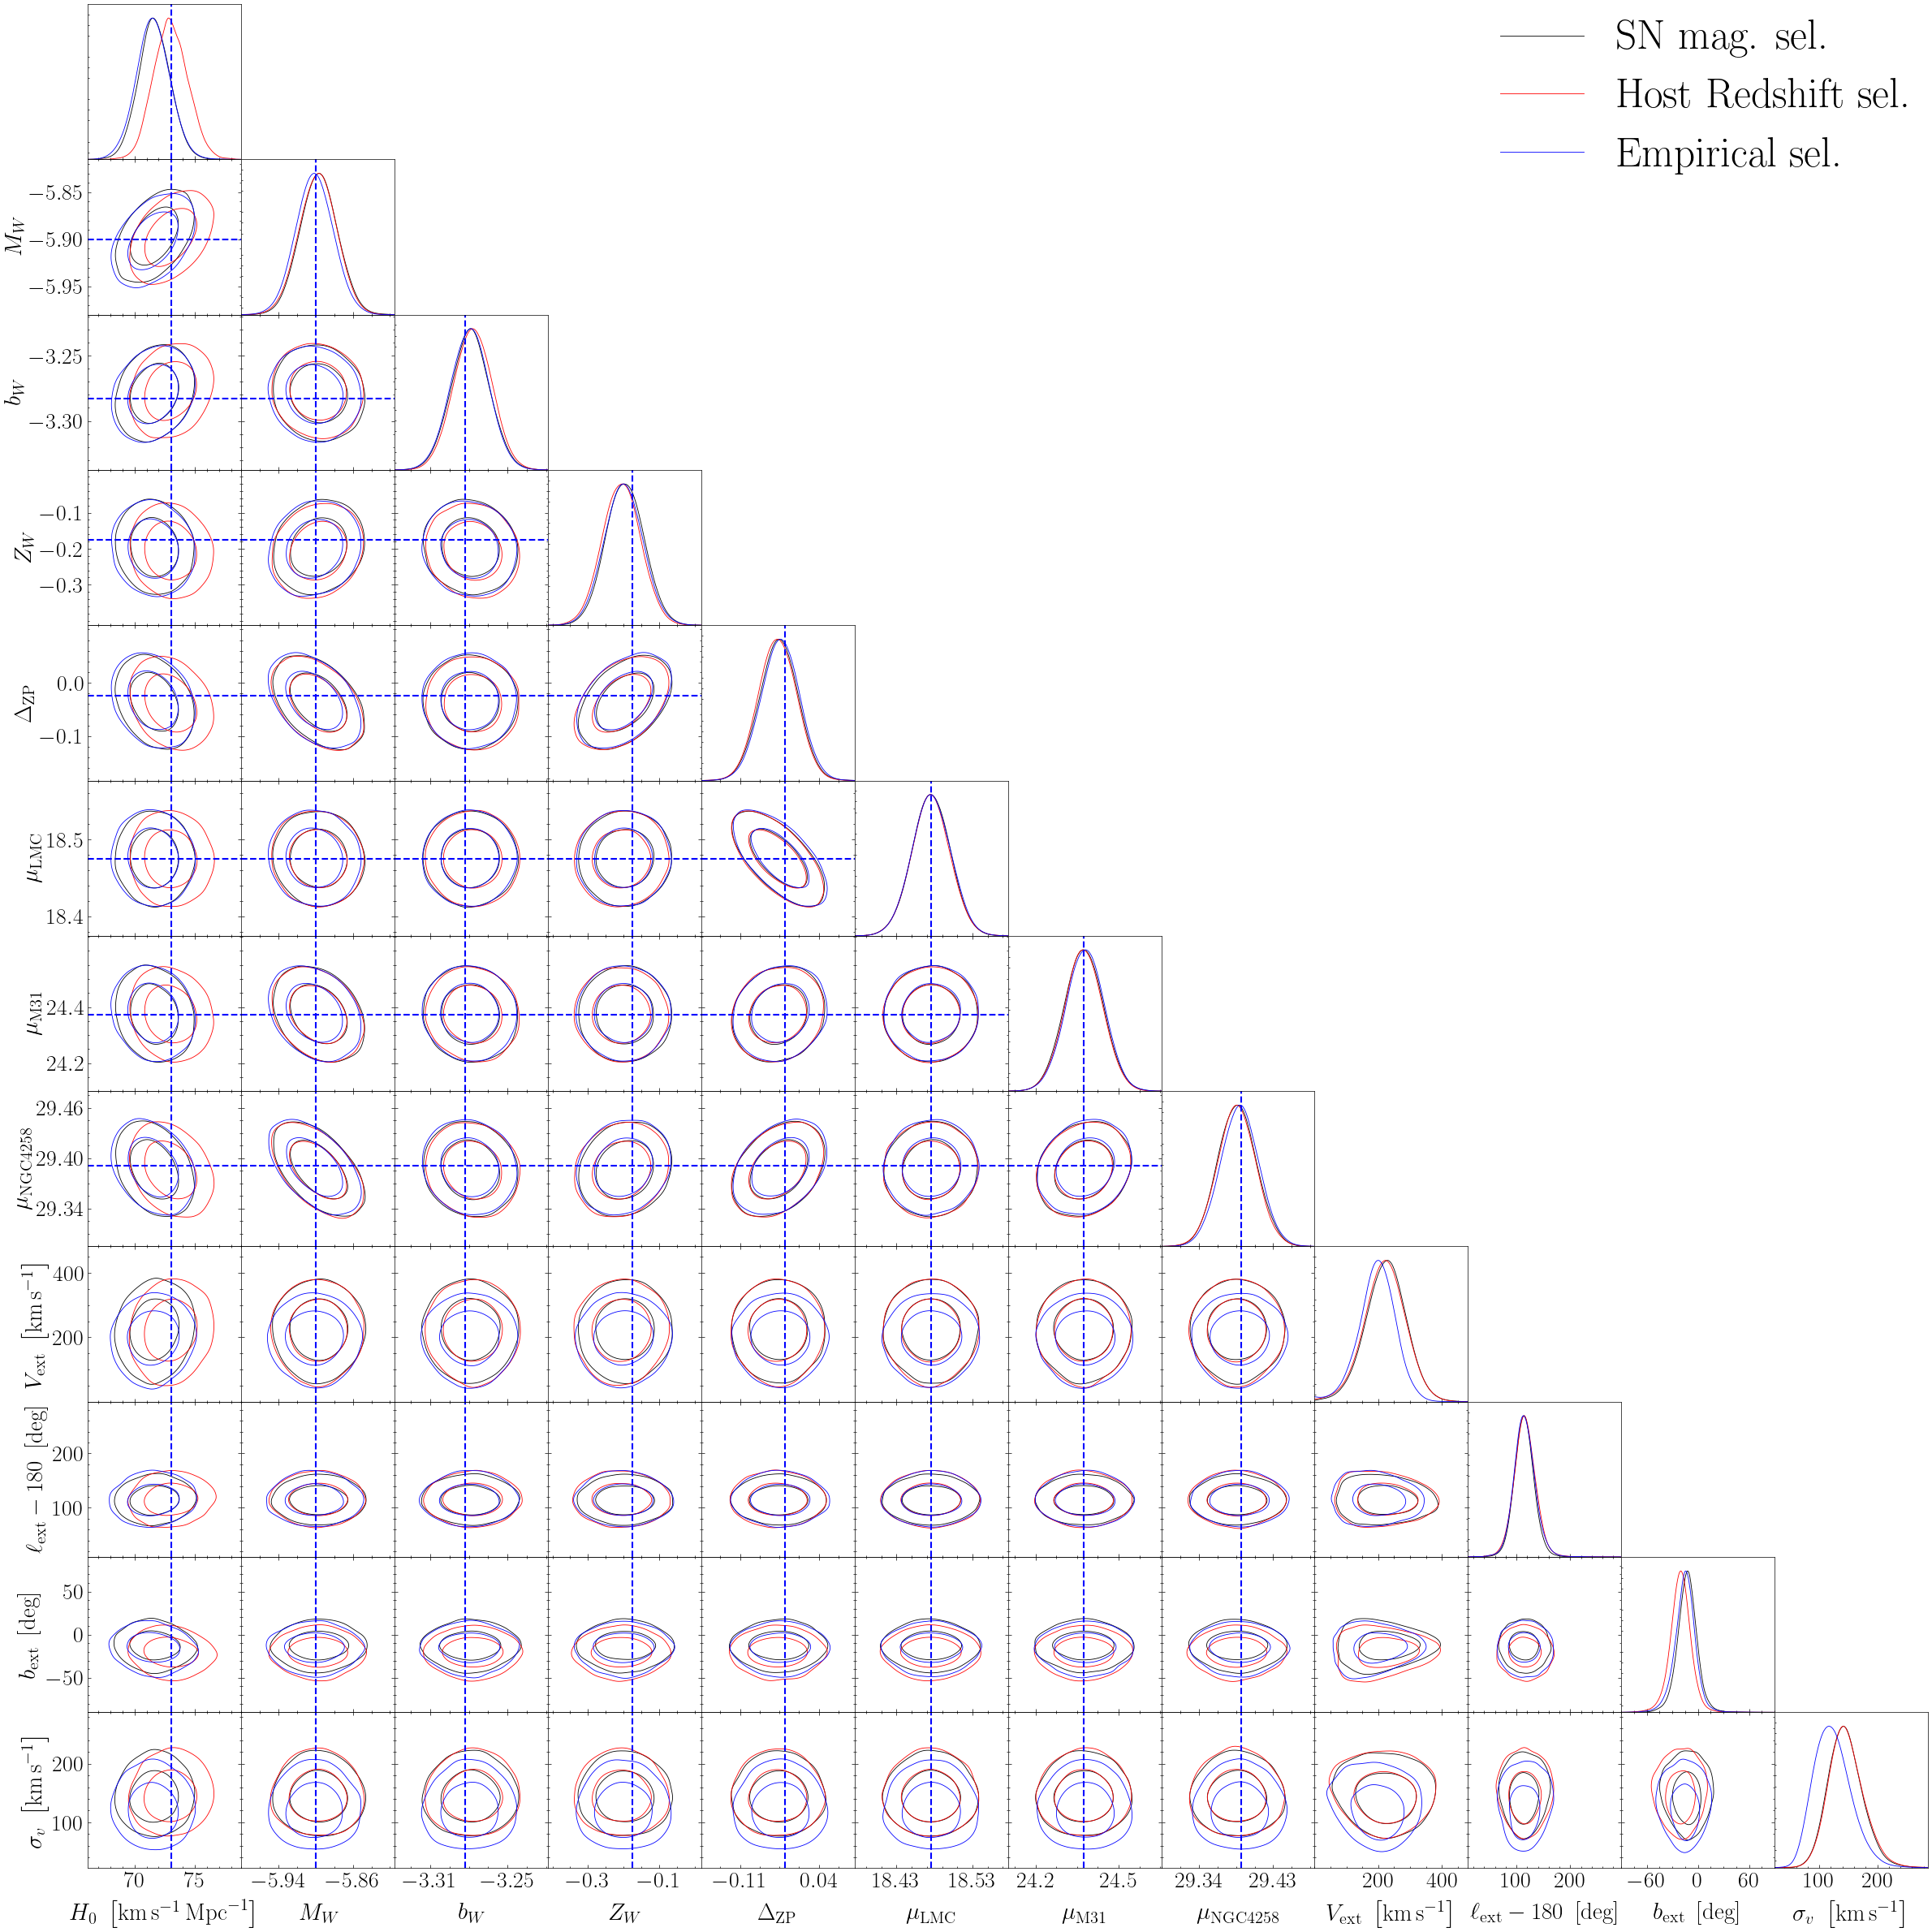

In [4]:
fnames = [
    "CH0_beta_1.0_sel-SN_magnitude_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5",
    "CH0_beta_1.0_sel-redshift_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5",
    "CH0_beta_1.0_sel-empirical_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5",
]

labels = [
    "SN mag. sel.",
    "Host Redshift sel.",
    "Empirical sel."
]

fnames = [join(root, fname) for fname in fnames]

truths_SH0ES = {"H0": 73.04, "M_W": -5.8999543, "b_W": -3.2831473,
          "Z_W": -0.17501639, "dZP": -0.025033418, "mu_LMC": 18.475368,
          "mu_N4258": 29.390965, "mu_M31": 24.373648,}
# truths_Planck = {"H0": 67.4,}
# truths_Carrick = {"beta": 0.43, "Vext_mag": 159, "Vext_ell": 304 - 180, "Vext_b": 6}

truths = [
    {"dict": truths_SH0ES, "color": "blue"},
    # {"dict": truths_Planck, "color": "blue",},
    # {"dict": truths_Carrick, "color": "green", "label": "Carrick+2023"},
]


candel.plot_corner_from_hdf5(
    fnames,
    keys=["H0", "M_W", "b_W", "Z_W", "dZP", "mu_LMC", "mu_M31", "mu_N4258", "beta", "Vext_mag", "Vext_ell", "Vext_b", "sigma_v"],
    labels=labels,
    apply_ell_offset=True,
    ell_range=[None, None],
    filename="/Users/rstiskalek/Downloads/Manticore_corner.pdf",
    fontsize=24,
    legend_fontsize=40,
    filled=False,
    truths=truths,
    )

### Comparison of all inferred $H_0$ values

In [ ]:
    
    
    


fnames = [
    "CH0_beta_1.0_sel-SN_magnitude_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5",
    "CH0_beta_1.0_sel-redshift_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5",
    "CH0_beta_1.0_sel-SN_magnitude_redshift_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5",
    "CH0_beta_1.0_sel-empirical_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5",
    # "Cepheid_H0_Manticore_joint_sel.hdf5",
    # "Cepheid_H0_Manticore_Cepheid_mag_sel.hdf5",
    # "Cepheid_H0_C15_SN_sel.hdf5",
    # "Cepheid_H0_C15_redshift_sel.hdf5",
    # "Cepheid_H0_sigma_v_Vext_SN_sel.hdf5",
    # "Cepheid_H0_sigma_v_Vext_redshift_sel.hdf5",
    # "Cepheid_H0_C15.hdf5",
    # "Cepheid_H0_PV_covmat.hdf5",
    # "Cepheid_H0_Vext_sigma_v.hdf5",
    # "Cepheid_H0_sigma_v.hdf5",
    # "Cepheid_H0_PV_covmat_scaled.hdf5",
]
labels = [
    "SN magnitude sel.",
    "Host redshift sel.",
    "SN magnitude + host redshift sel.",
    "Empirical sel.",
    # "Cepheid magnitude sel.",
    # r"$\boldsymbol{V}_{\rm ext},\,\sigma_v$ (SN sel.)",
    # r"$\boldsymbol{V}_{\rm ext},\,\sigma_v$ (redshift sel.)",
    # r"PVs from Carrick+2015, $\boldsymbol{V}_{\rm ext}$, diagonal covariance",
    # r"$\langle V_{\rm pec}\rangle = 0$, $\Lambda$CDM covariance",
    # r"$\boldsymbol{V}_{\rm ext}$, diagonal covariance",
    # r"$\langle V_{\rm pec}\rangle = 0$, diagonal covariance",
    # r"Cepheids only (uniform in volume prior)",
    # r"Cepheids only (uniform in $\mu$ prior)",
    # r"Cepheids full",
]


cols = [COLS[0], COLS[3], COLS[4], COLS[1]]



samples = [read_samples(root, fname, "H0") for fname in fnames]

samples_no_sel = read_samples(root, "CH0_beta_1.0_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5", "H0")

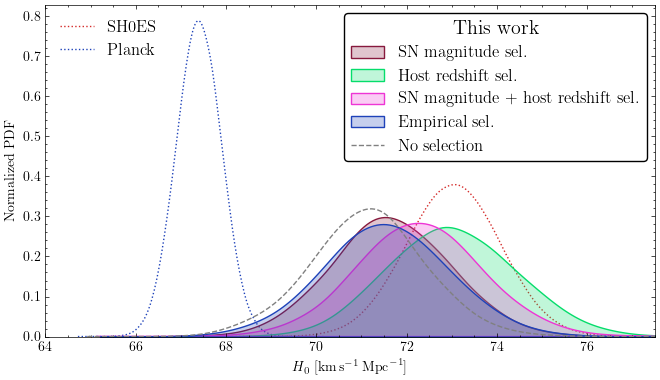

In [24]:
fig_width = 6.8  # in inches
fig_height = 4
bw = 2.0

filtered_palette = sns.color_palette("bright")
# filtered_palette = set1_palette[2:]  # skip red (0) and blue (1)

with plt.style.context("science"):
    plt.figure(figsize=(fig_width, fig_height))

    for i in range(len(samples)):
        sns.kdeplot(
            samples[i],
            label=labels[i],
            fill=True,
            bw_adjust=bw,
            # color=filtered_palette[i % len(filtered_palette)]
            color=cols[i],
        )
    
    sns.kdeplot(
        samples_no_sel,
        label="No selection",
        fill=False,
        ls="dashed",
        bw_adjust=1.5 * bw,
        color="gray",
    )

    sns.kdeplot(
        norm(73.04, 1.04).rvs(size=500000),
        label="SH0ES",
        fill=False,
        # alpha=0.2,
        ls="dotted",
        color=COLS[2],
        bw_adjust=bw,
        zorder=-1,
    )
    sns.kdeplot(
        norm(67.4, 0.5).rvs(size=500000),
        label="Planck",
        fill=False,
        # alpha=0.2,
        ls="dotted",
        color=COLS[1],
        bw_adjust=bw,
        zorder=-1,
    )

    # plt.text(
    # 0.5, 0.5, "PRELIMINARY",
    # fontsize=48, color='gray', alpha=0.5,
    # ha='center', va='center', zorder=10,
    # transform=plt.gcf().transFigure, rotation=30)

    plt.xlabel(r"$H_0 ~ [\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}]$")
    plt.ylabel("Normalized PDF")
    # plt.legend(ncol=1, fontsize="large")

    ax = plt.gca()

    # Get all handles and labels
    handles, labels_all = ax.get_legend_handles_labels()

    # Separate by label
    main_handles = []
    main_labels = []
    ref_handles = []
    ref_labels = []

    for h, l in zip(handles, labels_all):
        if l in ["SH0ES", "Planck"]:
            ref_handles.append(h)
            ref_labels.append(l)
        else:
            main_handles.append(h)
            main_labels.append(l)

    legend1 = ax.legend(
        main_handles, main_labels,
        loc="upper right",
        fontsize="large",
        title="This work",
        title_fontsize="x-large",
        frameon=True,
        edgecolor='black',
        facecolor='white',
        fancybox=True,
        framealpha=1
    )
    ax.add_artist(legend1)
    ax.legend(ref_handles, ref_labels, loc="upper left", fontsize="large")


    plt.xlim(64, 77.5)
    plt.tight_layout()
    plt.savefig("/Users/rstiskalek/Downloads/H0_comparison.pdf", dpi=500, bbox_inches="tight")
    plt.show()

### $H_0$ stacked plot

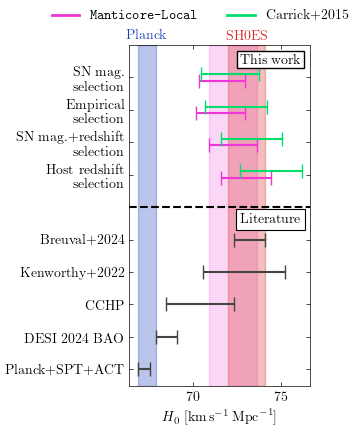

In [37]:
cols = ["#87193d", "#1e42b9", "#d42a29", "#05dd6b", "#ee35d5"]

import matplotlib.lines as mlines


manticore_col = cols[4]
carrick_col   = cols[3]  # amber
lit_col = "#444444"  # grey

# ---- Main grouped results ----
spec = [
    # ["No selection", "Manticore", manticore_col,
    #  "CH0_beta_1.0_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5"],
    # ["No selection", "Carrick", carrick_col,
    #  "CH0_Carrick2015.hdf5"],

    ["SN mag.\nselection", "Manticore", manticore_col,
     "CH0_beta_1.0_sel-SN_magnitude_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5"],
    ["SN mag.\nselection", "Carrick", carrick_col,
     "CH0_sel-SN_magnitude_Carrick2015.hdf5"],

    ["Empirical\nselection", "Manticore", manticore_col,
     "CH0_beta_1.0_sel-empirical_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5"],
    ["Empirical\nselection", "Carrick", carrick_col,
     "CH0_sel-empirical_Carrick2015.hdf5"],

    ["SN mag.+redshift\nselection", "Manticore", manticore_col,
     "CH0_beta_1.0_sel-SN_magnitude_redshift_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5"],
    ["SN mag.+redshift\nselection", "Carrick", carrick_col,
     "CH0_sel-SN_magnitude_redshift_Carrick2015.hdf5"],

    ["Host redshift\nselection", "Manticore", manticore_col,
     "CH0_beta_1.0_sel-redshift_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5"],
    ["Host redshift\nselection", "Carrick", carrick_col,
     "CH0_sel-redshift_Carrick2015.hdf5"],
]

# ---- External refs (bands + vertical lines) ----
refs = [
    ("SH0ES", 73.04, 1.04, cols[2]),
    ("Planck", 67.4, 0.5, cols[1]),
]

# ---- Extra literature (horizontal whiskers only, neutral grey) ----

literature = [
    (None, None, "", None),
    (73.2, 0.9, "Breuval+2024", lit_col),
    (72.9, 2.3, "Kenworthy+2022", lit_col),
    (70.4, 1.9, "CCHP", lit_col),
    (68.52, 0.62, "DESI 2024 BAO", lit_col),
    # (67.6, 1.1, "ACT DR4", lit_col),
    # (68.8, 1.5, "SPT-3G", lit_col),
    (67.24, 0.35, "Planck+SPT+ACT", lit_col),
]

# ---- Compute percentiles for spec ----
sel_labels, dataset_labels, colors, fnames = zip(*spec)
samples = [read_samples(root, fname, "H0") for fname in fnames]

vals = np.array([np.percentile(np.asarray(s), [16, 50, 84]) for s in samples])
med  = vals[:, 1]
errm = med - vals[:, 0]
errp = vals[:, 2] - med

unique_selections = list(dict.fromkeys(sel_labels))  # preserves order
nsel = len(unique_selections)
y_positions = {sel: i for i, sel in enumerate(unique_selections[::-1])}
y = np.array([y_positions[sel] for sel in sel_labels])

# ---- Plot ----
fig_width, fig_height = 3.35, 4.5
with plt.style.context("science"):
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    lw = plt.rcParams["lines.linewidth"]

    # External refs: shaded ±1σ bands + central line
    for name, mu, sig, col in refs:
        ax.axvspan(mu - sig, mu + sig, alpha=0.3, color=col, zorder=-2)
        # ax.axvline(mu, lw=1.2, color=col, zorder=-1)
        ax.text(mu, 1.01, name, ha="center", va="bottom", color=col,
                transform=ax.get_xaxis_transform())

    # Main results (Manticore vs Carrick side-by-side)
    offset = 0.1
    for i in range(len(med)):
        offs = -offset if dataset_labels[i] == "Manticore" else offset
        ax.errorbar(med[i], y[i] + offs,
                    xerr=[[errm[i]], [errp[i]]],
                    fmt="none", ecolor=colors[i],
                    elinewidth=1.5*lw, capsize=5,
                    label=dataset_labels[i] if i < 2 else None)

    
    # find the index of "SN magnitude sel." + "Manticore"
    fid_idx = [i for i, (sel, ds) in enumerate(zip(sel_labels, dataset_labels))
               if "SN mag.+" in sel and ds == "Manticore"][0]

    # median ± error for that fiducial row
    fid_mu  = med[fid_idx]
    fid_lo  = fid_mu - errm[fid_idx]
    fid_hi  = fid_mu + errp[fid_idx]

    ax.axvspan(fid_lo, fid_hi, color=manticore_col, alpha=0.2, zorder=-3)

    # Add literature values below the main selections
    lit_base = -1  # start just below zero
    lit_y = []
    for j, (mu, sig, label, col) in enumerate(literature):
        ypos = lit_base - j
        lit_y.append((ypos, label))
        if mu is None:   # skip blank row
            continue
        ax.errorbar(mu, ypos, xerr=sig,
                    fmt="none", ecolor=col,
                    elinewidth=1.5*lw, capsize=5)

    # Horizontal line separating blocks
    sep_y = lit_base + 0
    ax.axhline(y=sep_y, color="black", lw=lw * 1.5, ls="--")

    # Y-axis labels: selections + literature
    yticks = list(range(nsel)) + [y for y, _ in lit_y]
    ylabels = unique_selections[::-1] + [lab for _, lab in lit_y]

    ax.text(0.95, 0.975, "This work",
            ha="right", va="top", weight="bold",
            transform=ax.transAxes,
            bbox=dict(facecolor="white", edgecolor="black",
                      boxstyle="square,pad=0.2"))

    ax.text(0.95, sep_y - 0.2, "Literature",
            ha="right", va="top", weight="bold",
            transform=ax.get_yaxis_transform(),   # x in axis fraction, y in data coords
            bbox=dict(facecolor="white", edgecolor="black",
                      boxstyle="square", linewidth=0.8))
    
    manticore_handle = mlines.Line2D([], [], color=manticore_col, lw=2,
                                     label=r"\texttt{Manticore-Local}")
    carrick_handle   = mlines.Line2D([], [], color=carrick_col, lw=2,
                                     label=r"Carrick+2015")
    
    ax.legend(handles=[manticore_handle, carrick_handle],
              loc="lower left", ncol=2,bbox_to_anchor=(-0.5, 1.03),  # outside, above plot
              frameon=False, framealpha=1, facecolor="white", edgecolor="black")

    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)

    ax.set_ylim(lit_base - len(literature) + 0.5, nsel)
    ax.set_xlabel(r"$H_0~[\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}]$")
    ax.set_ylabel("")
    ax.minorticks_off()

    fig.tight_layout()
    plt.savefig("/Users/rstiskalek/Downloads/H0_stacked.pdf", dpi=500)
    plt.show()

### Selection bias test

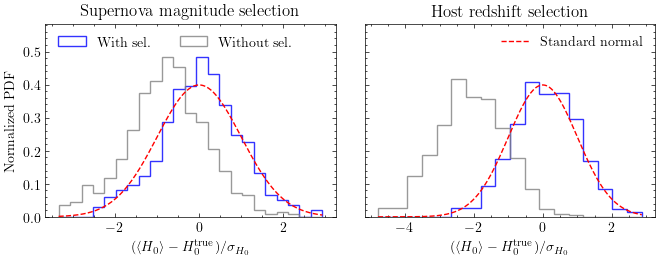

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from os.path import join

root_here = "/Users/rstiskalek/Projects/CANDEL/results/CH0/bias_test"

with plt.style.context("science"):
    fig, axes = plt.subplots(1, 2, figsize=(6.8, 2.8), sharey=True)

    hist_kwargs = {
        "alpha": 0.8,
        "histtype": "step",
        "density": True,   # <--- key change here
        }

    # --- Supernova magnitude selection ---
    data_SN_acc = np.load(join(root_here, "H0_bias_SN_selection.npy"))
    data_SN_not = np.load(join(root_here, "H0_bias_SN_selection_not_accountted.npy"))
    all_data_SN = np.concatenate([data_SN_acc, data_SN_not])
    bins_SN = np.histogram_bin_edges(all_data_SN, bins="auto")

    axes[0].hist(data_SN_acc, bins=bins_SN, label="With sel.", **hist_kwargs, color="blue")
    axes[0].hist(data_SN_not, bins=bins_SN, label="Without sel.", **hist_kwargs, color="gray")
    axes[0].set_title("Supernova magnitude selection")
    axes[0].set_xlabel(r"$(\langle H_0 \rangle - H_0^{\rm true})/\sigma_{H_0}$")
    # Standard normal overlay (density=1)
    x_SN = np.linspace(bins_SN[0], bins_SN[-1], 200)
    axes[0].plot(x_SN, norm.pdf(x_SN), ls="--", color="red")
    axes[0].legend(loc="upper left", ncol=2,)


    # --- Host redshift selection ---
    data_z_acc = np.load(join(root_here, "H0_bias_redshift_selection.npy"))
    data_z_not = np.load(join(root_here, "H0_bias_redshift_selection_not_accounted.npy"))
    all_data_z = np.concatenate([data_z_acc, data_z_not])
    bins_z = np.histogram_bin_edges(all_data_z, bins="auto")

    axes[1].hist(data_z_acc, bins=bins_z, **hist_kwargs, color="blue")
    axes[1].hist(data_z_not, bins=bins_z, **hist_kwargs, color="gray")
    axes[1].set_title("Host redshift selection")
    axes[1].set_xlabel(r"$(\langle H_0 \rangle - H_0^{\rm true})/\sigma_{H_0}$")

    # Standard normal overlay (density=1)
    x_z = np.linspace(bins_z[0], bins_z[-1], 200)
    axes[1].plot(x_z, norm.pdf(x_z), ls="--", color="red", label="Standard normal")

    axes[0].set_ylabel("Normalized PDF")
    axes[1].legend()

    ylim = axes[0].get_ylim()
    axes[1].set_ylim(ylim[0], 1.15 * ylim[1])

    plt.tight_layout()
    plt.savefig("/Users/rstiskalek/Downloads/H0_bias_selection.pdf", dpi=500, bbox_inches="tight")
    plt.show()

### Read off values for a table

In [10]:
import posterior_agreement

# x = read_sampleks(root, "Cepheid_distances_mu_uniform.hdf5", "mu_N4258")

# fname = "Cepheid_H0_C15_<X>.hdf5"
# fname = "CH0_<X>.hdf5"
# fname = "CH0_noVext_<X>_PV_covmat_PV_covmat_scalingweight_by_Neff.hdf5"
# fname = "CH0_noVext_<X>_PV_covmat_PV_covmat_scaling_weight_by_Neff.hdf5"
# fname = "CH0_<X>_Carrick2015.hdf5"
# fname = "CH0_beta_1.0_<X>_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5"
fname = "CH0_<X>_manticore_2MPP_MULTIBIN_N256_DES_V2.hdf5"


H0_planck = norm(67.4, 0.5).rvs(50000)
H0_SH0ES = norm(73.04, 1.04).rvs(50000)

# for key in ["no_sel", "redshift_sel", "SN_sel", "joint_sel", "Cepheid_mag_sel"]:
for key in ["", "sel-redshift", "sel-SN_magnitude", "sel-SN_magnitude_redshift", "sel-empirical"]:
    if key == "":
        fname_i = fname.replace("_<X>", "")
    else:
        fname_i = fname.replace("<X>", key)
    x = read_samples(root, fname_i, "H0")

    agreement_SH0ES = posterior_agreement.compute_agreement((H0_SH0ES, x)).sigma
    agreement_Planck = posterior_agreement.compute_agreement((H0_planck, x)).sigma
    # agreement_SH0ES = 0.0
    # agreement_Planck = 0.0

    key = key if key != "" else "no_sel"

    mu = x.mean()
    std = x.std()

    # print(key, f"${mu:.3f} \\pm {std:.3f}$ | SH0ES: {agreement_SH0ES:.3f} | Planck: {agreement_Planck:.2f}")
    # print(key, f"${mu:.1f} \\pm {std:.1f}$ | SH0ES: {agreement_SH0ES:.3f} | Planck: {agreement_Planck:.2f}")
    print(key, f"${mu:.1f} \\pm {std:.1f}$")

no_sel $70.9 \pm 1.2$
sel-redshift $72.7 \pm 1.4$
sel-SN_magnitude $71.5 \pm 1.3$
sel-SN_magnitude_redshift $72.0 \pm 1.4$
sel-empirical $71.5 \pm 1.4$


In [ ]:
from scipy.stats import norm
import posterior_agreement

# x = read_samples(root, "Cepheid_H0_Vext_sigma_v.hdf5", "H0")
x = norm(71.8, 1.2).rvs(50000)

print(x.mean(), x.std())

chains = (H0_SH0ES, x)
agreement_1d = posterior_agreement.compute_agreement(chains)
print("SH0ES: p-value %.3f, corresponding to %.4f sigmas"%(agreement_1d.PTE, agreement_1d.sigma))

chains = (H0_planck, x)
agreement_1d = posterior_agreement.compute_agreement(chains)
print("Planck: p-value %.3f, corresponding to %.4f sigmas"%(agreement_1d.PTE, agreement_1d.sigma))

71.80891107310256 1.1931770118790868
SH0ES: p-value 0.442, corresponding to 0.7690 sigmas
Planck: p-value 0.001, corresponding to 3.4077 sigmas


In [30]:
from scipy.integrate import simpson

x = np.linspace(65, 85, 10000)
dist = norm(74.1, 1.8)
pdf = dist.pdf(x)


pdf_weighted = dist.logpdf(x) - 45 * np.log(x)
pdf_weighted = np.exp(pdf_weighted - np.max(pdf_weighted))  # Normalize to max
pdf_weighted /= simpson(pdf_weighted, x)  # Normalize to area=1

mu = simpson(x * pdf_weighted, x=x)
std = np.sqrt(simpson((x - mu)**2 * pdf_weighted, x=x))

print(mu, std)

72.07623510830236 1.8250698248016508


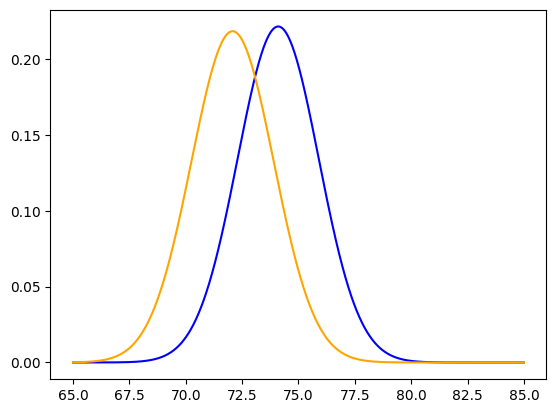

In [31]:
plt.figure()
plt.plot(x, pdf, label="Posterior PDF", color="blue")

plt.plot(x, pdf_weighted, label="Weighted PDF", color="orange")

plt.show()